/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:53: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:162: RuntimeWarning: Mean of empty slice
/Users/yanyancheng/opt/anaconda3/envs/jnPython3.7.0_basemap/lib/python3.7/site-packages/ipykernel_launcher.py:171: RuntimeWarning: Mean of empty slice
/Us

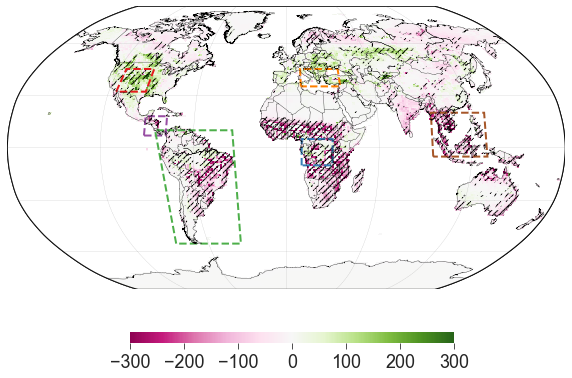

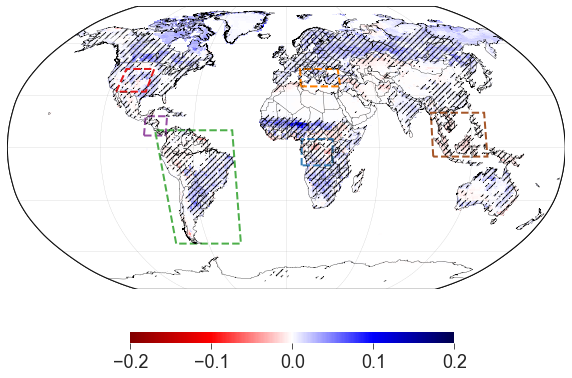

In [8]:
import numpy as np
import cartopy
import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.colors import BoundaryNorm
import sys
import pandas as pd
import matplotlib as mpl
from netCDF4 import Dataset
from matplotlib import cm
from mpl_toolkits.basemap import Basemap, cm
import math
import shapefile as shp  # Requires the pyshp package
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.style.use('seaborn-ticks')

title_size  = 20
marker_size = 7
stepsize    = 0.01
label_size  = 9
border_size = 0.4
tick_size   = 9
legend_size = 9
line_width  = 1.0
rotation=45
text_size=8
alpha       = 0.25
border_width = 0.0

figure_width=10
figure_length=6
figure_rows = 1
figure_cols = 1
subplot_ratio=1

glat, glon = (159,288)
nlat,nlong=159,288
beglat=-60.78534
endlat=88.11518
beglong=-180
endlong=180
step=1.0
lats = np.linspace(beglat,endlat, glat)
lons = np.linspace(beglong,endlong, glon)

def read_data(fname,var):
    pt=Dataset(fname, 'r')
    data=pt.variables[var]
    data=np.array(data)
    return data

def fillmissing_lucc(data):
    data=np.where(data>=1.00001, np.nan,data)
    data=np.where(data<0.0, np.nan,data)
    return data

def mask_data(data,missVal):
    data=np.where(data==missVal, np.nan,data)
    data=np.where(data>1e35, np.nan,data)
    return data

def fill_missingVal(data,missVal):
    data=np.where(data>=missVal, np.nan,data)
    return data
    
def draw_screen_poly( lats, lons, m, color):
    from matplotlib.patches import Polygon
    x, y = m( lons, lats )
    xy = zip(x,y)
    poly = Polygon( list(xy), facecolor='none', edgecolor=color,alpha=1.0,linewidth=2.0,linestyle="--")
    plt.gca().add_patch(poly)
    
def plotmap(data,ax,var,sigtest):
    lon_0 = np.mean(lons)
    lat_0 = np.mean(lats)
    m = Basemap(projection='robin',lon_0=lon_0,lat_0=lat_0,\
                llcrnrlat=np.amin(lats),urcrnrlat=np.amax(lats),\
                llcrnrlon=np.amin(lons),urcrnrlon=np.amax(lons),\
                rsphere=6371200.,resolution='l',area_thresh=10000,ax=ax)

    linewidth=0.3
    m.drawcoastlines(color='k', linewidth=linewidth)
    m.drawcountries(color='k', linewidth=linewidth)
    m.drawmapboundary(fill_color='white', zorder=-1)
    m.fillcontinents(color='0.8', lake_color='white', zorder=0)
    
    m.drawparallels(np.arange(-60.,91.,30.), dashes=[1,1], linewidth=0.25, color='0.5')
    m.drawmeridians(np.arange(0., 360., 60.), dashes=[1,1], linewidth=0.25, color='0.5')
        
    regions = ["Central US", "Central America","EU",\
               "SEA","Africa","South America"]
    beglats = [32,7,35,\
               -5,-10,-55]
    endlats = [45,18,45,\
               20,5,10]
    beglons = [-115,-92,10,\
               95,10,-85]
    endlons = [-95,-78,37,\
               130,30,-35]
    colors = ["#e41a1c","#984ea3","#ff7f00",\
              "#a65628","#377eb8","#4daf4a"]
    for lat_var_b, lat_var_e, lon_var_b, lon_var_e,color in zip(beglats,endlats,beglons,endlons,colors):
        lats_rec = [lat_var_b,lat_var_e,lat_var_e,lat_var_b]
        lons_rec = [lon_var_b,lon_var_b,lon_var_e,lon_var_e]
        draw_screen_poly( lats_rec, lons_rec, m ,color)
    
    if (var=="albedo"):
        cmap = plt.get_cmap('seismic_r')
    else:
        cmap = plt.get_cmap('PiYG')
    
    cmap.set_under('white')
    cmap.set_bad('white')
        
    viridisBig = plt.get_cmap('jet', 16)
    newcmp = ListedColormap(viridisBig(np.linspace(0.2, 0.4, 8)))
    mcolors = plt.cm.YlOrRd(np.linspace(0.2, 0.5, 8))
    cmap_custom = ListedColormap(mcolors)

    plotdata = np.vstack([m.transform_scalar(data[:, :], lons, lats, glon, glat).reshape(glat, glon)])
    lon = np.arange(-180, 180, 1.25)
    lat = np.arange(-90, 90, 0.94)
    
    lon, lat = np.meshgrid(lon, lat)
    lon, lat = m(lon, lat)
    cs = m.pcolormesh(lon, lat, data,  vmin=vmin, vmax=vmax, cmap=cmap, \
                      rasterized=False, edgecolor='0.6', linewidth=0,alpha = 1.0)
    
    zm = np.ma.masked_greater(sigtest, 0.05)
    m.pcolor(lon, lat, zm, hatch='////', alpha=0.)
    ticks = np.arange(vmin,vmax+1,1)
    mpl.rcParams['axes.linewidth'] = border_width
    mpl.rcParams['axes.edgecolor'] = "white"
    
    return cs

def read_one_ensemble_sigtest(var,caseid):
    rcp="SSP226Lu-BIOCROP_"+caseid
    fname=data_dir +var+"_"+rcp+"_end_century_JJA_siglvl.nc"
    data = read_data(fname, "sigtest")
    data = fill_missingVal(data,1e36)
    data = roller(data)
    sigtest=fill_missingVal(data,1e36)
    return sigtest

def read_one_ensemble(var,caseid):   
    fname=data_dir +var+"_diff_"+caseid+"_end_century_JJA.nc"
    data = read_data(fname, "diff")
    data = fill_missingVal(data,1e36)
    data_ssp1=fill_missingVal(data,1e36)
    return data_ssp1

def sub_function(var):
    fig, ax = plt.subplots(figure_rows, figure_cols, figsize=(figure_width,figure_length))
    ensbase=np.empty((ens_size,192,288))
    for caseid,i in zip(["ensemble1","ensemble2","ensemble3"],np.arange(ens_size)):
        ensbase[i,:,:] = read_one_ensemble(var,caseid)
    data=np.nanmean(ensbase,axis=0)
    
    data[data==0]=np.nan
    plotdata=data
    
    ### significant test
    ensbase=np.empty((ens_size,192,288))
    for caseid,i in zip(["ensemble1","ensemble2","ensemble3"],np.arange(ens_size)):
        ensbase[i,:,:] = read_one_ensemble_sigtest(var,caseid)
    sigtest = np.nanmean(ensbase,axis=0)
                
    cs = plotmap(plotdata,ax,var,sigtest)
    ticks = np.arange(vmin,vmax+interval,interval)
    
    cbaxes = fig.add_axes([0.296, 0.05, 0.45, 0.027]) # X,Y position,length, wideth, 
    cbar = fig.colorbar(cs, cax=cbaxes, ticks=ticks, orientation='horizontal', extend='neither', \
                 spacing='proportional')
    cbar.ax.tick_params(labelsize=18)
    
    fig_dir = "../figures/"
    fname=fig_dir+"Fig4bc_"+var+".pdf"
#     fig.savefig(fname,format='pdf',bbox_inches='tight')
    return data


dfTrue = False    
ens_size=3
missVal=1e36
season = "JJA"

data_dir= "../data/"
for var in ["ET","albedo"]:
    if (dfTrue):
        if (var == "albedo"):
            vmax=0.02
            vmin=(-1)*vmax
            interval=0.01
        else:
            vmax=5
            vmin=(-1)*vmax
            interval=2.5
    else:
        if (var == "albedo"):
            vmin=-0.2
            vmax=0.2
            interval=0.1
        else:
            vmin=-300
            vmax=300
            interval=100
    data = sub_function(var)
